In [21]:
import pandas as pd
import quandl 
import matplotlib as plt
import seaborn as sns
%matplotlib inline

In [3]:
start = pd.to_datetime('2012-01-01')
end = pd.to_datetime('2017-01-01')

In [5]:
aapl = quandl.get('WIKI/AAPL.11',start_date=start,end_date=end)
cisco = quandl.get('WIKI/CSCO.11',start_date=start,end_date=end)
ibm = quandl.get('WIKI/IBM.11',start_date=start,end_date=end)
amzn = quandl.get('WIKI/AMZN.11',start_date=start,end_date=end)

In [6]:
aapl

,Adj. Close
Date,
2012-01-03,52.848787
2012-01-04,53.132802
2012-01-05,53.722681
2012-01-06,54.284287
2012-01-09,54.198183
...,...
2016-12-23,115.080808
2016-12-27,115.811668
2016-12-28,115.317843


In [10]:
## Metrics revision
# Get the frist price & last prices
print(f"Apple: {aapl.iloc[0]['Adj. Close']} ; {aapl.iloc[-1]['Adj. Close']}")

Apple: 52.848786580038 ; 114.38945378366


In [15]:
# Create a new column in each individual stock data for  the Normalised Return)
for stock_df in (aapl,cisco,ibm,amzn):
    stock_df['Normed Return'] = stock_df['Adj. Close'] / stock_df.iloc[0]['Adj. Close']

In [16]:
aapl.head()

,Adj. Close,Normed Return
Date,,
2012-01-03,52.848787,1.000000
2012-01-04,53.132802,1.005374
2012-01-05,53.722681,1.016536
2012-01-06,54.284287,1.027162
2012-01-09,54.198183,1.025533


In [18]:
aapl.tail()

,Adj. Close,Normed Return
Date,,
2016-12-23,115.080808,2.177549
2016-12-27,115.811668,2.191378
2016-12-28,115.317843,2.182034
2016-12-29,115.288214,2.181473
2016-12-30,114.389454,2.164467


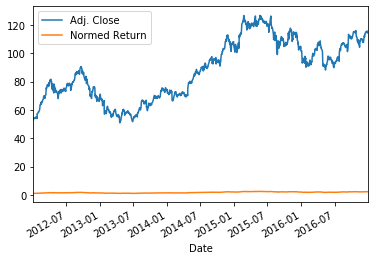

In [28]:
aapl[['Adj. Close','Normed Return']].plot()

In [31]:
# Create the allocation weighting column using a list comprehension technique
# For the sake of the exercise, our porfolio is weighted, and that we invested $1,000,000 on day 1:
#   Apple : 30%, Amazon : 20%, Cisco 30%, IBM, 10%
#list(zip((aapl,amzn,cisco,ibm),[0.3,0.2,0.4,0.1])

In [36]:
weightings = [0.3,0.2,0.4,0.1]
for stock_df, alloc in zip((aapl,amzn,cisco,ibm,),weightings):
    stock_df['Allocation'] = stock_df['Normed Return'] * alloc

In [37]:
aapl.head()

,Adj. Close,Normed Return,Allocation
Date,,,
2012-01-03,52.848787,1.000000,0.300000
2012-01-04,53.132802,1.005374,0.301612
2012-01-05,53.722681,1.016536,0.304961
2012-01-06,54.284287,1.027162,0.308149
2012-01-09,54.198183,1.025533,0.307660


In [38]:
original_investment = 1000000
for stock_df in (aapl,amzn,cisco,ibm):
    stock_df['Position Value'] = stock_df['Allocation'] * original_investment

In [40]:
aapl.head()

,Adj. Close,Normed Return,Allocation,Position Value
Date,,,,
2012-01-03,52.848787,1.000000,0.300000,300000.000000
2012-01-04,53.132802,1.005374,0.301612,301612.236461
2012-01-05,53.722681,1.016536,0.304961,304960.727573
2012-01-06,54.284287,1.027162,0.308149,308148.724558
2012-01-09,54.198183,1.025533,0.307660,307659.946988


In [46]:
# Create a portfolio dataframe of all the position values.

all_pos_values = [aapl['Position Value'], amzn['Position Value'], cisco['Position Value'], ibm['Position Value']]
portfolio_val = pd.concat(all_pos_values, axis=1)

In [47]:
portfolio_val.head()

,Position Value,Position Value,Position Value,Position Value
Date,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000
2012-01-04,301612.236461,198301.960565,407729.468599,99592.055824
2012-01-05,304960.727573,198413.673686,406226.516371,99119.699410
2012-01-06,308148.724558,203999.329721,404723.564144,97981.749866
2012-01-09,307659.946988,199474.948333,407300.053677,97471.819646


In [49]:
# Rename the columns
portfolio_val.columns = ['AAPL Pos','AAZN Pos','CISCO Pos','IBM Pos']

In [50]:
portfolio_val.head()

,AAPL Pos,AAZN Pos,CISCO Pos,IBM Pos
Date,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000
2012-01-04,301612.236461,198301.960565,407729.468599,99592.055824
2012-01-05,304960.727573,198413.673686,406226.516371,99119.699410
2012-01-06,308148.724558,203999.329721,404723.564144,97981.749866
2012-01-09,307659.946988,199474.948333,407300.053677,97471.819646


In [52]:
# Calc total position postions for each day (ie row)
portfolio_val['Total Pos'] = portfolio_val.sum(axis=1)

In [53]:
portfolio_val.head()

,AAPL Pos,AAZN Pos,CISCO Pos,IBM Pos,Total Pos
Date,,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000,1.000000e+06
2012-01-04,301612.236461,198301.960565,407729.468599,99592.055824,1.007236e+06
2012-01-05,304960.727573,198413.673686,406226.516371,99119.699410,1.008721e+06
2012-01-06,308148.724558,203999.329721,404723.564144,97981.749866,1.014853e+06
2012-01-09,307659.946988,199474.948333,407300.053677,97471.819646,1.011907e+06


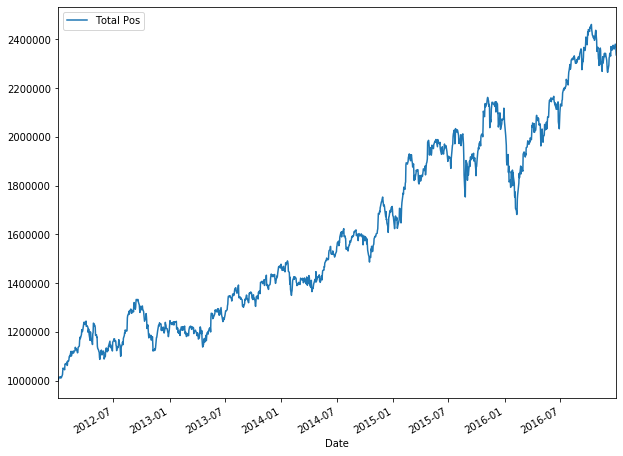

In [56]:
portfolio_val['Total Pos'].plot(figsize=(10,8),legend='Total Position')

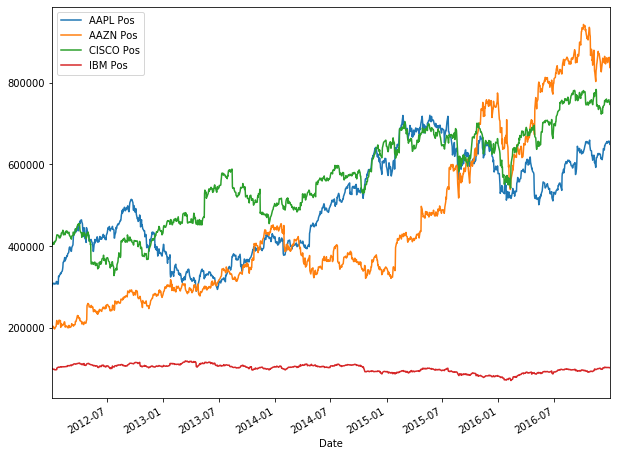

In [58]:
portfolio_val[['AAPL Pos','AAZN Pos','CISCO Pos','IBM Pos']].plot(figsize=(10,8))

In [59]:
portfolio_val.head()

,AAPL Pos,AAZN Pos,CISCO Pos,IBM Pos,Total Pos
Date,,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000,1.000000e+06
2012-01-04,301612.236461,198301.960565,407729.468599,99592.055824,1.007236e+06
2012-01-05,304960.727573,198413.673686,406226.516371,99119.699410,1.008721e+06
2012-01-06,308148.724558,203999.329721,404723.564144,97981.749866,1.014853e+06
2012-01-09,307659.946988,199474.948333,407300.053677,97471.819646,1.011907e+06


In [60]:
# Calc daily returns, std dev, and average daily returns
portfolio_val['Daily Return'] = portfolio_val['Total Pos'].pct_change(1)

In [61]:
portfolio_val.head()

,AAPL Pos,AAZN Pos,CISCO Pos,IBM Pos,Total Pos,Daily Return
Date,,,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000,1.000000e+06,NaN
2012-01-04,301612.236461,198301.960565,407729.468599,99592.055824,1.007236e+06,0.007236
2012-01-05,304960.727573,198413.673686,406226.516371,99119.699410,1.008721e+06,0.001474
2012-01-06,308148.724558,203999.329721,404723.564144,97981.749866,1.014853e+06,0.006080
2012-01-09,307659.946988,199474.948333,407300.053677,97471.819646,1.011907e+06,-0.002903


In [62]:
portfolio_val['Daily Return'].describe()

count    1257.000000
mean        0.000741
std         0.011470
min        -0.044810
25%        -0.005337
50%         0.000728
75%         0.007155
max         0.056692
Name: Daily Return, dtype: float64

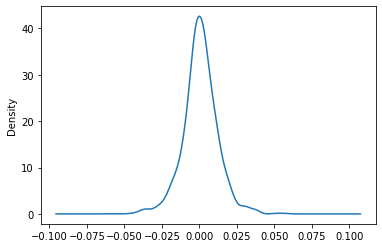

In [66]:
portfolio_val['Daily Return'].plot(kind='kde')

In [71]:
# Cumulative Return Percentage ()
cumulative_return = 100 * ( portfolio_val['Total Pos'][-1] / portfolio_val['Total Pos'][0] - 1)
cumulative_return

133.57158590851768

In [72]:
portfolio_val['Total Pos'][-1]

2335715.8590851766

In [74]:
portfolio_val.iloc[-1]

AAPL Pos        6.493401e+05
AAZN Pos        8.377032e+05
CISCO Pos       7.472724e+05
IBM Pos         1.014002e+05
Total Pos       2.335716e+06
Daily Return   -1.204594e-02
Name: 2016-12-30 00:00:00, dtype: float64

In [75]:
# Calculate the Sharpe Ratio (use 0% as the risk free rate)
sharpe_ratio = portfolio_val['Daily Return'].mean() / portfolio_val['Daily Return'].std()
sharpe_ratio

0.0645826252033888

In [76]:
# Now calc the Annualised Sharpe Ratio (this data is daily, so use the k factor)
# An ASR of > 1 is considered good. Anything above 2 is very good, but also rare.
ASR = sharpe_ratio * (252**0.5)
ASR

1.025217391823154